In [1]:
import sys

sys.path.append("../")

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from positioning.readwav import readwav
from positioning.get_spectrum_amplitude import get_tukey_spectrum_amplitude
from positioning.sound_db import SoundDB
from positioning import tools

In [3]:
true_pos = pd.read_csv("../data/test18-distance-amplitude/test18_line_positions.csv")

In [4]:
true_pos

,x,y
0,0.457020,1.131164
1,0.475750,1.177523
2,0.494481,1.223883
3,0.513211,1.270242
4,0.531941,1.316601
5,0.550672,1.362960
6,0.569402,1.409319
7,0.588132,1.455679
8,0.606863,1.502038
9,0.625593,1.548397


In [5]:
sns.set(style="whitegrid")

Text(12.444444444444445, 0.5, 'y (m)')

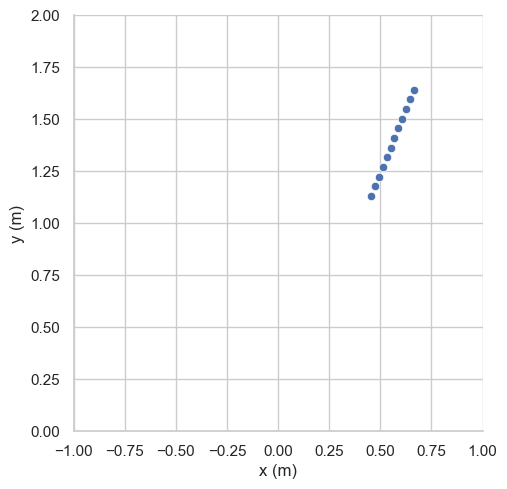

In [6]:
sns.relplot(x="x", y="y", data=true_pos)
plt.xlim(-1, 1)
plt.ylim(0, 2)
plt.xlabel("x (m)")
plt.ylabel("y (m)")

In [7]:
spectrum = []
amplitude = []
for i in range(1, 13):
    test_signal = readwav(f"../data/test18-distance-amplitude/test{i}.wav")
    sp = []
    amp = []
    for j in range(100):
        spec, ampli = get_tukey_spectrum_amplitude(
            test_signal[j * 96000 : (j + 2) * 96000],
            first_freq=15000,
            last_freq=22000,
            interval_length=0.2,
        )
        sp.append(spec)
        amp.append(ampli)
    spectrum.append(sp)
    amplitude.append(amp)

In [8]:
true_pos["distance"] = np.sqrt(true_pos["x"] ** 2 + true_pos["y"] ** 2)
true_pos

,x,y,distance
0,0.457020,1.131164,1.22
1,0.475750,1.177523,1.27
2,0.494481,1.223883,1.32
3,0.513211,1.270242,1.37
4,0.531941,1.316601,1.42
5,0.550672,1.362960,1.47
6,0.569402,1.409319,1.52
7,0.588132,1.455679,1.57
8,0.606863,1.502038,1.62
9,0.625593,1.548397,1.67


In [9]:
df_amp = pd.DataFrame()
for i in range(12):
    tmp = pd.DataFrame(amplitude[i])
    tmp["distance"] = true_pos["distance"][i]
    df_amp = pd.concat([df_amp, tmp])
df_amp = df_amp.reset_index(drop=True)
df_amp.rename(columns={0: "amplitude"}, inplace=True)
df_amp.head()

,amplitude,distance
0,0.060432,1.22
1,0.060827,1.22
2,0.060827,1.22
3,0.060793,1.22
4,0.061148,1.22


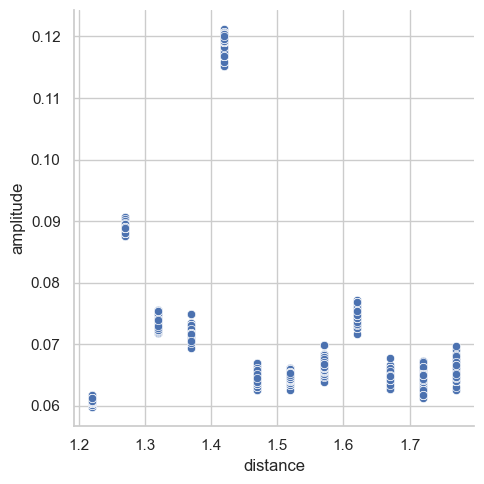

In [10]:
sns.relplot(x="distance", y="amplitude", data=df_amp)

In [13]:
spectrum_avg = np.mean(spectrum, axis=1)
spectrum_avg.shape

(12, 28)

Text(0, 0.5, 'Amplitude')

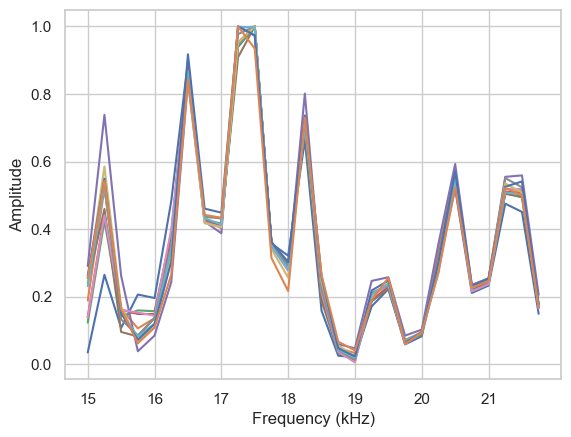

In [17]:
for i in range(12):
    plt.plot(spectrum_avg[i])
plt.xticks(np.arange(0, 28, 4), ["15", "16", "17", "18", "19", "20", "21"])
plt.xlabel("Frequency (kHz)")
plt.ylabel("Amplitude")

In [18]:
amplitude_all_band = []
for i in range(1, 13):
    test_signal = readwav(f"../data/test18-distance-amplitude/test{i}.wav")
    amp = []
    for j in range(100):
        spec, ampli = get_tukey_spectrum_amplitude(
            test_signal[j * 96000 : (j + 2) * 96000],
            first_freq=15000,
            last_freq=22000,
            interval_length=0.2,
            ampli_band="all",
        )
        amp.append(ampli)
    amplitude_all_band.append(amp)

In [19]:
df_amp_all_band = pd.DataFrame()
for i in range(12):
    tmp = pd.DataFrame({"amplitude": amplitude_all_band[i]})
    tmp["distance"] = true_pos["distance"][i]
    df_amp_all_band = pd.concat([df_amp_all_band, tmp])
df_amp_all_band.head()

,amplitude,distance
0,0.962890,1.22
1,0.966356,1.22
2,0.966356,1.22
3,0.965313,1.22
4,0.963223,1.22


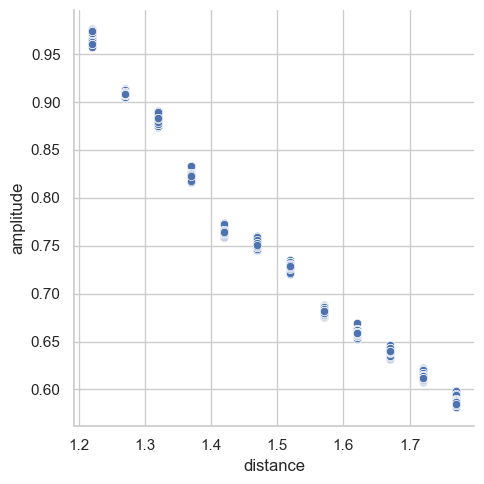

In [20]:
sns.relplot(df_amp_all_band, x="distance", y="amplitude")

In [21]:
df_amp_all_band_avg = pd.DataFrame()
for i in range(12):
    tmp = pd.DataFrame(
        [[np.mean(amplitude_all_band[i]), true_pos["distance"][i]]],
        columns=["amplitude", "distance"],
    )
    df_amp_all_band_avg = pd.concat([df_amp_all_band_avg, tmp])
df_amp_all_band_avg.reset_index(drop=True, inplace=True)
df_amp_all_band_avg.head()

,amplitude,distance
0,0.971467,1.22
1,0.909018,1.27
2,0.881075,1.32
3,0.821620,1.37
4,0.765705,1.42


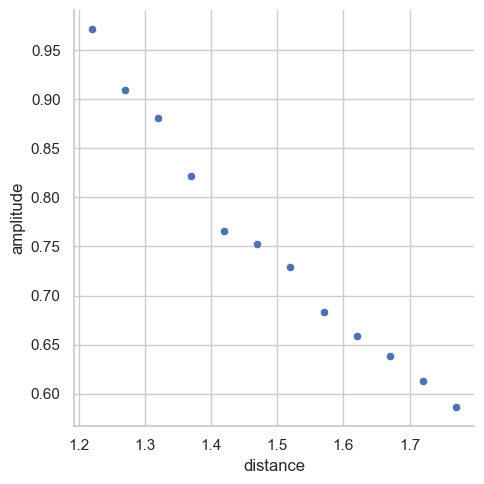

In [22]:
sns.relplot(df_amp_all_band_avg, x="distance", y="amplitude")

In [23]:
base_amp = df_amp_all_band_avg.at[0, "amplitude"]
df_amp_all_band_avg["theoretical"] = (
    df_amp_all_band_avg.at[0, "amplitude"]
    * df_amp_all_band_avg.at[0, "distance"]
    / df_amp_all_band_avg["distance"]
)

In [24]:
df_amp_all_band_avg

,amplitude,distance,theoretical
0,0.971467,1.22,0.971467
1,0.909018,1.27,0.933220
2,0.881075,1.32,0.897871
3,0.821620,1.37,0.865102
4,0.765705,1.42,0.834641
5,0.753027,1.47,0.806252
6,0.729333,1.52,0.779730
7,0.682846,1.57,0.754898
8,0.658664,1.62,0.731599
9,0.638192,1.67,0.709694


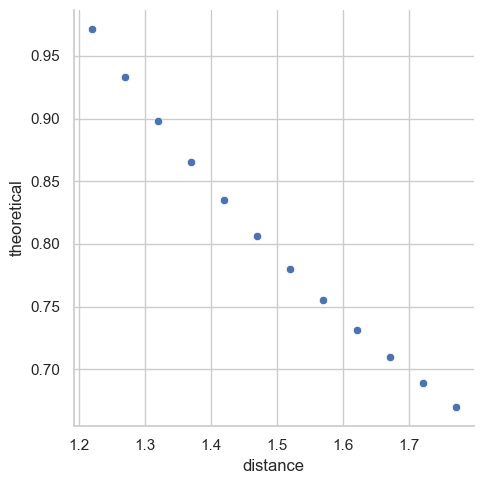

In [25]:
sns.relplot(df_amp_all_band_avg, x="distance", y="theoretical")

<Axes: xlabel='distance', ylabel='amplitude'>

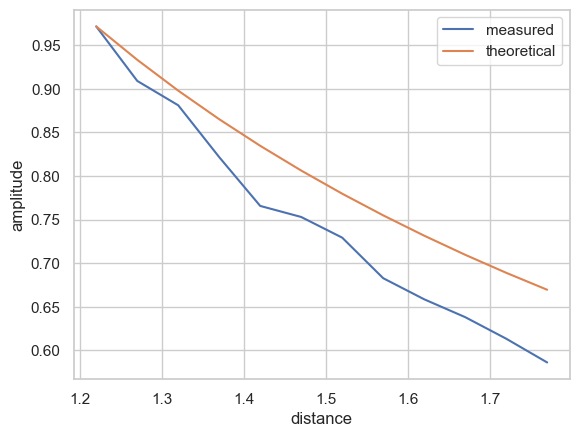

In [26]:
fig, ax = plt.subplots()
sns.lineplot(
    data=df_amp_all_band_avg, x="distance", y="amplitude", ax=ax, label="measured"
)
sns.lineplot(
    data=df_amp_all_band_avg, x="distance", y="theoretical", ax=ax, label="theoretical"
)

In [27]:
df_amp_all_band["estimated_distance"] = 1.22 * base_amp / df_amp_all_band["amplitude"]

In [28]:
distances_array = np.arange(1.22, 1.82, 0.01)
theoretical_amp = 1.22 * base_amp / distances_array

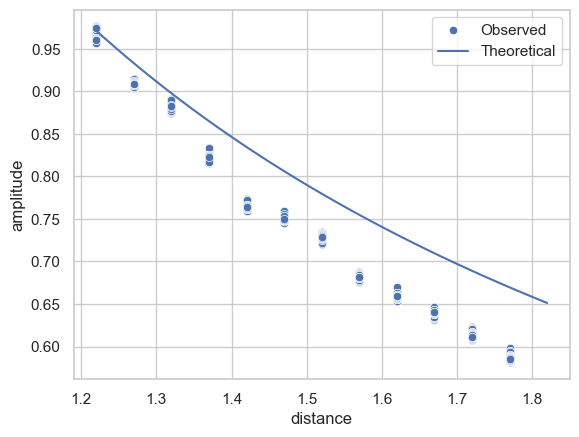

In [29]:
fig, ax = plt.subplots()
sns.scatterplot(df_amp_all_band, x="distance", y="amplitude", label="Observed", ax=ax)
sns.lineplot(x=distances_array, y=theoretical_amp, label="Theoretical", ax=ax)
ax.legend()

In [30]:
spectrum = []
amplitude = []
for i in range(1, 13):
    test_signal = readwav(f"../data/test18-distance-amplitude/test{i}.wav")
    sp = []
    amp = []
    for j in range(100):
        spec, ampli = get_tukey_spectrum_amplitude(
            test_signal[j * 96000 : (j + 2) * 96000],
            first_freq=16000,
            last_freq=22000,
            interval_length=0.2,
        )
        sp.append(spec)
        amp.append(ampli)
    spectrum.append(sp)
    amplitude.append(amp)

In [31]:
amplitude_all_band = []
for i in range(1, 13):
    test_signal = readwav(f"../data/test18-distance-amplitude/test{i}.wav")
    amp = []
    for j in range(100):
        spec, ampli = get_tukey_spectrum_amplitude(
            test_signal[j * 96000 : (j + 2) * 96000],
            first_freq=16000,
            last_freq=22000,
            interval_length=0.2,
            ampli_band="all",
        )
        amp.append(ampli)
    amplitude_all_band.append(amp)

In [32]:
df_amp_all_band = pd.DataFrame()
for i in range(12):
    tmp = pd.DataFrame({"amplitude": amplitude_all_band[i]})
    tmp["distance"] = true_pos["distance"][i]
    df_amp_all_band = pd.concat([df_amp_all_band, tmp])
df_amp_all_band.reset_index(drop=True, inplace=True)
df_amp_all_band.head()

,amplitude,distance
0,0.994876,1.22
1,0.999554,1.22
2,0.999554,1.22
3,0.999234,1.22
4,0.998962,1.22


In [33]:
base_amp = np.mean(df_amp_all_band[df_amp_all_band["distance"] == 1.22]["amplitude"])

In [34]:
base_amp

1.003212809433291

In [35]:
df_amp_all_band["estimated_distance"] = 1.22 * base_amp / df_amp_all_band["amplitude"]

In [36]:
df_amp_all_band.head()

,amplitude,distance,estimated_distance
0,0.994876,1.22,1.230223
1,0.999554,1.22,1.224466
2,0.999554,1.22,1.224466
3,0.999234,1.22,1.224858
4,0.998962,1.22,1.225191


In [37]:
theoretical_s16 = 1.22 * base_amp / distances_array

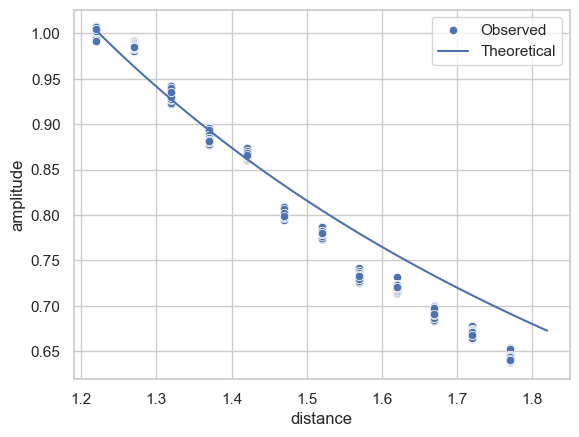

In [39]:
fig, ax = plt.subplots()
sns.scatterplot(df_amp_all_band, x="distance", y="amplitude", ax=ax, label="Observed")
sns.lineplot(x=distances_array, y=theoretical_s16, ax=ax, label="Theoretical")
plt.legend()